<a href="https://colab.research.google.com/github/luimui/DataScience/blob/main/exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

## Recap: Overfitting / Underfitting

1. Explain the bias / variance trade-off in your own words.
*Increasing number of features leads to high variance due to overfit, decreasing leads to stronger bias*
2. For the data below, plot `X` against `y_orig` and `X` against `y` (**hint**: `y` is a noisy variant of `y_orig`).
**
3. Split the data into train (80%) and test (20%) sets.
4. Fit a `DecisionTreeRegressor` to the train set.
5. Calculate the mean absolute error for train and test set.
6. Visualize the predictions for the train and test set.
7. Try different values for the parameter `max_depth` of the `DecisionTreeRegressor`. Can you underfit, fit well, and overfit?
8. How does this connect to the bias / variance trade-off?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
# generate X and y
np.random.seed(12)
n_steps = 4
X = np.arange(50 * n_steps).reshape((-1,1))
y_orig = np.repeat(np.arange(4), int(X.shape[0] / n_steps))
y = y_orig + (np.random.random(y_orig.size) - 0.5) * 2

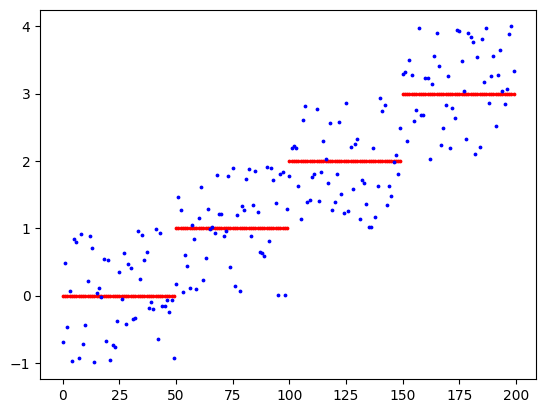

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X,y_orig,c="red",s=3)
plt.scatter(X,y,c="blue",s=3)

In [13]:
model = DecisionTreeRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([ 0.58291337,  3.55256267,  0.92519381,  2.68918988,  0.90062705,
        1.21155539,  1.21155539,  1.33991526,  3.06200608,  1.98190994,
        0.99027632,  0.01181871,  0.70547108, -0.38020483, -0.93315714,
        0.0964375 ,  0.16854534,  1.77043396,  1.28335618, -0.9583804 ,
        0.53626831,  1.04649214,  0.60034012,  3.26406309,  1.66766497,
        2.48482063,  2.2117903 ,  2.19923838,  1.01311215,  2.7471651 ,
        3.99854732,  2.77035539,  2.2117903 ,  0.58291337,  1.33991526,
        3.65359995, -0.97085008,  3.7651414 ,  2.29844737, -0.43234329])

In [16]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.7528758305124839
MSE is 0.8996240387509771
R2 score is 0.4760678761577041


In [17]:
y_pred_train = model.predict(X_train)

mae = metrics.mean_absolute_error(y_train, y_pred_train)
mse = metrics.mean_squared_error(y_train, y_pred_train)
r2 = metrics.r2_score(y_train, y_pred_train)

print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MAE is 0.0
MSE is 0.0
R2 score is 1.0


max_depth: 1 
 mse train: 0.7075837701233653,  mse test: 0.6294255900716608 



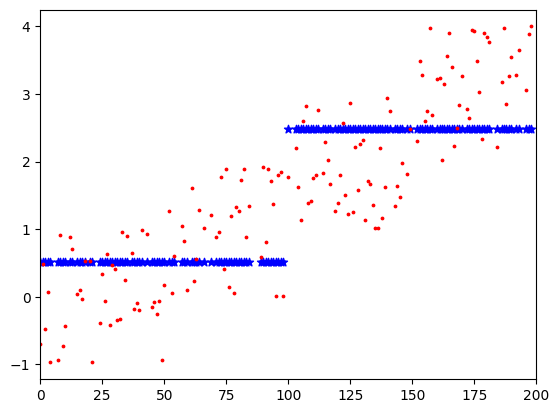

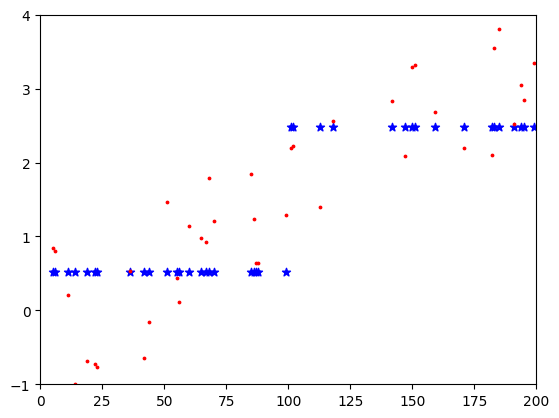

max_depth: 2 
 mse train: 0.48066920086644666,  mse test: 0.5918216499027332 



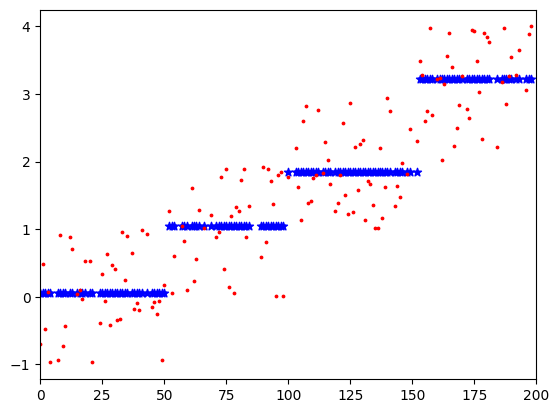

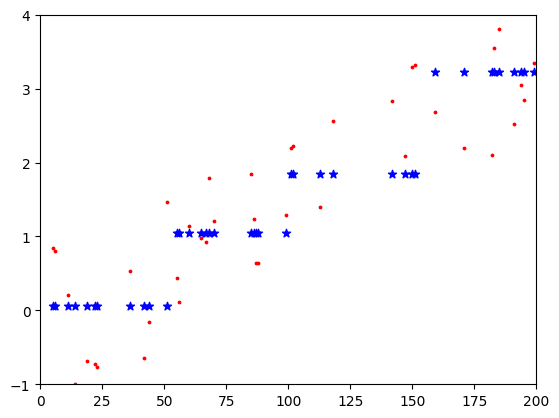

max_depth: 3 
 mse train: 0.45389372535596817,  mse test: 0.597316815094694 



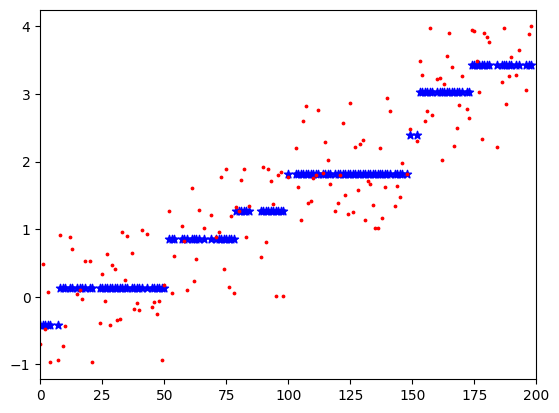

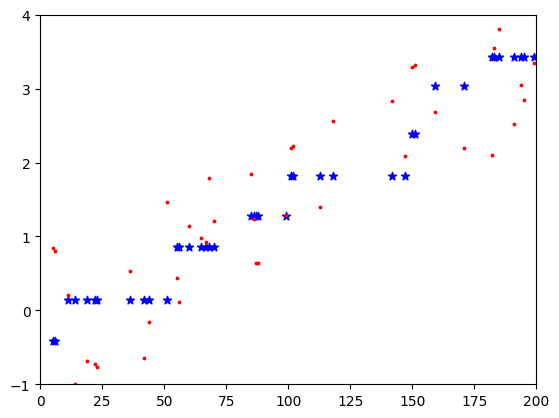

max_depth: 4 
 mse train: 0.4081938624135148,  mse test: 0.6811751144319123 



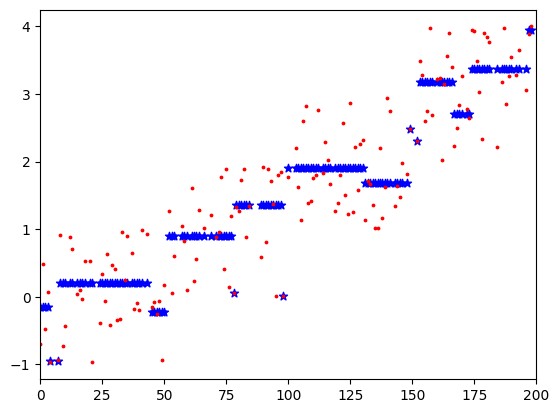

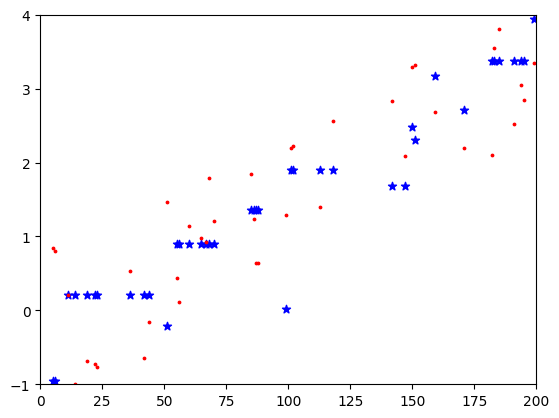

max_depth: 5 
 mse train: 0.3600858520304723,  mse test: 0.6813106929269448 



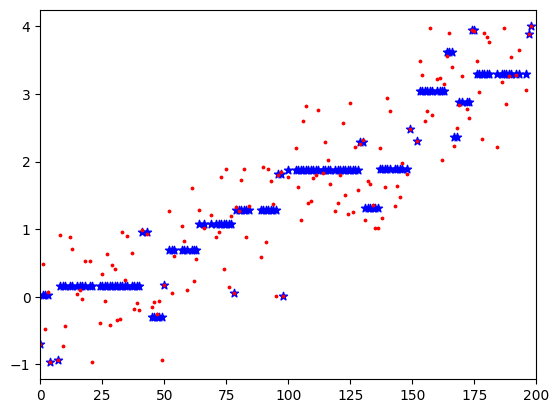

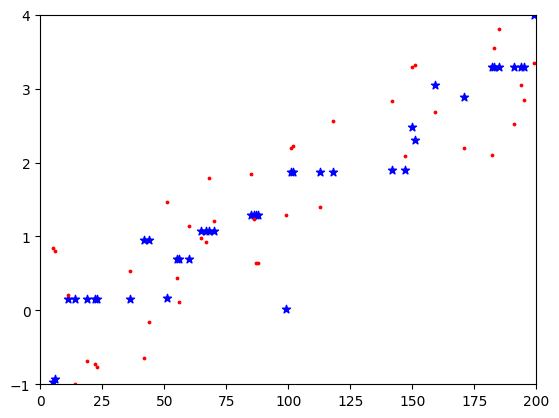

max_depth: 6 
 mse train: 0.3144712218039616,  mse test: 0.6953631504914529 



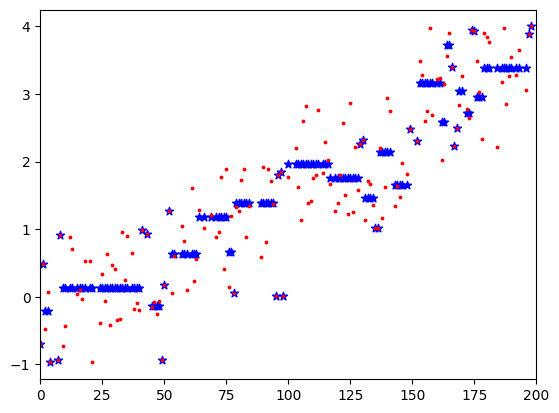

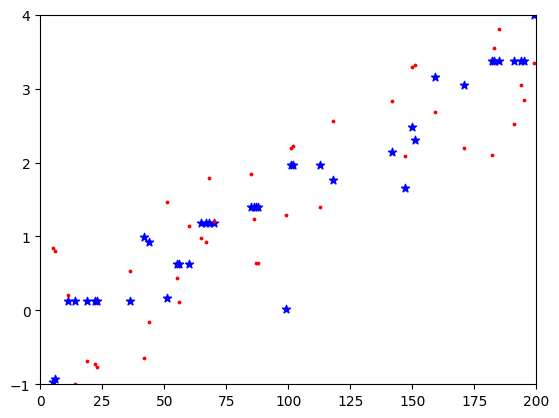

max_depth: 7 
 mse train: 0.23710567224969656,  mse test: 0.7275839686790863 



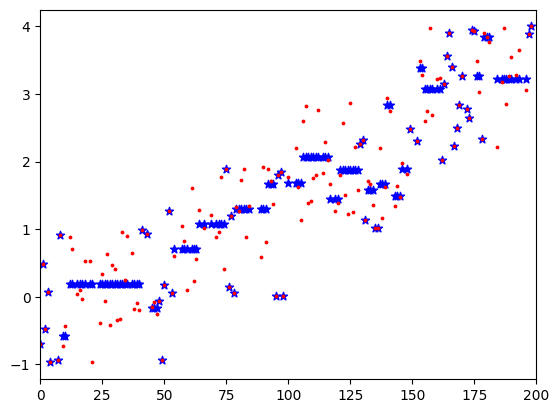

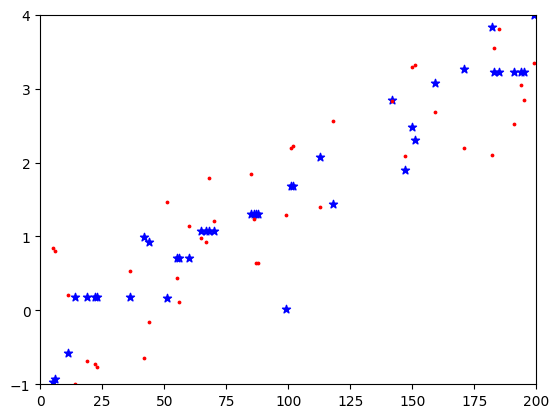

max_depth: 8 
 mse train: 0.1752389289356205,  mse test: 0.7804365215253821 



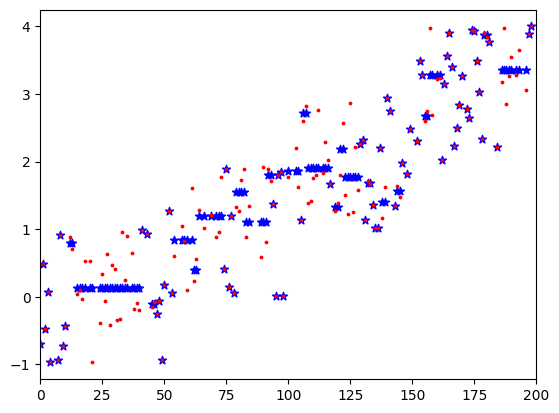

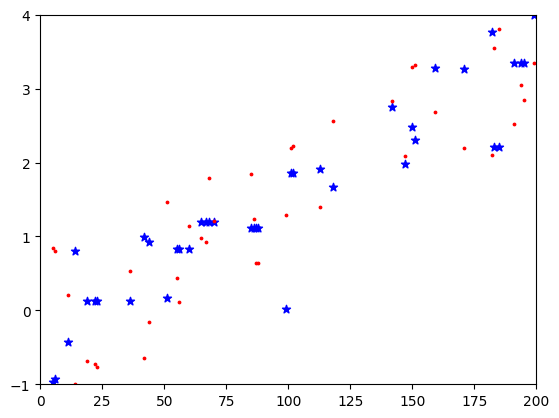

max_depth: 9 
 mse train: 0.12723811632396353,  mse test: 0.7521074020578705 



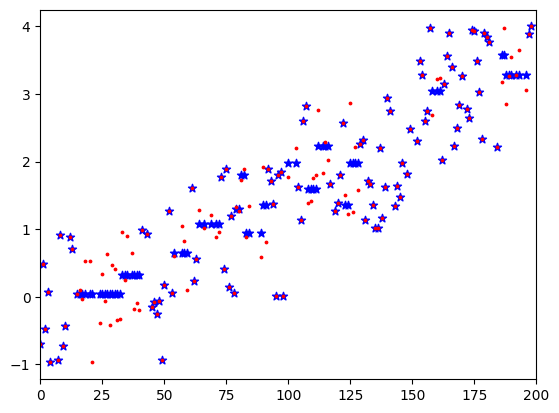

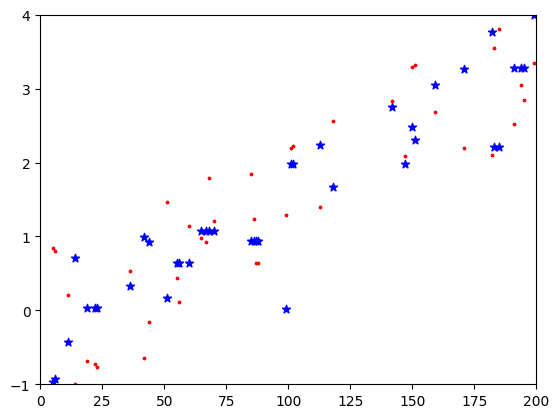

max_depth: 10 
 mse train: 0.06072690634522848,  mse test: 0.7678210805873703 



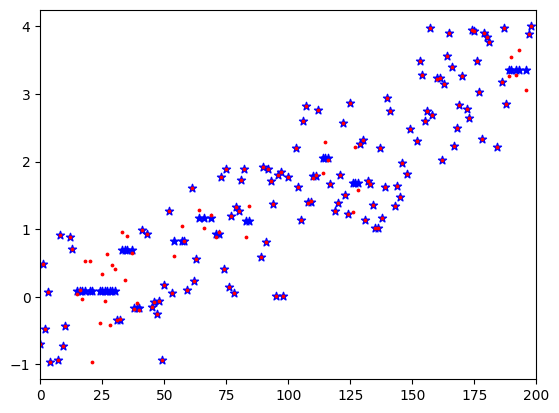

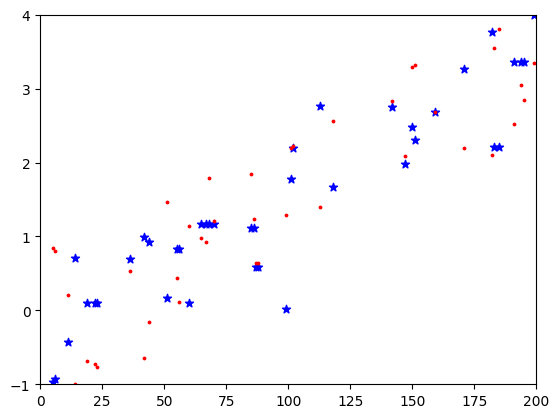

max_depth: 11 
 mse train: 0.0427342460633987,  mse test: 0.7524707346751596 



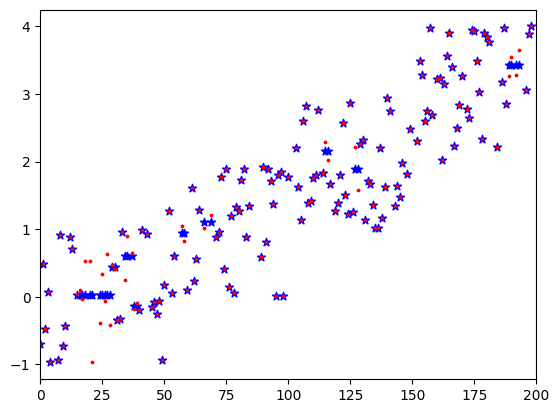

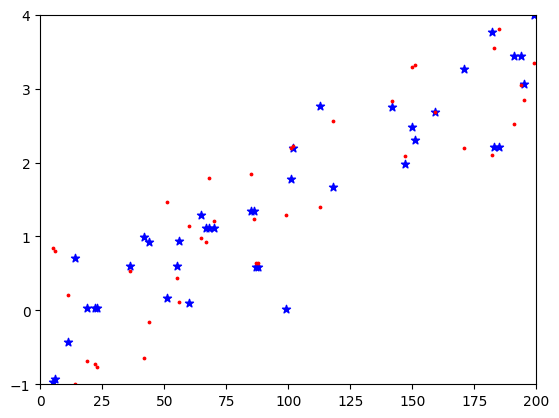

max_depth: 12 
 mse train: 0.028067265498303497,  mse test: 0.7525302200965653 



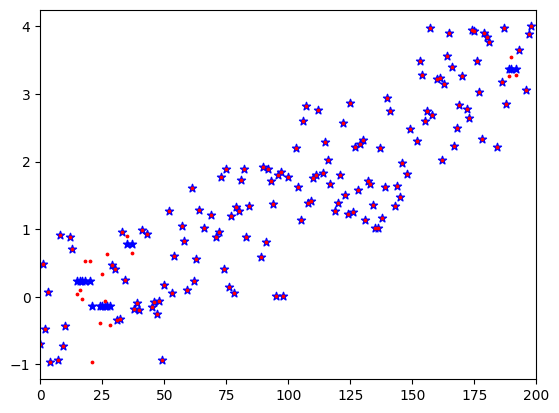

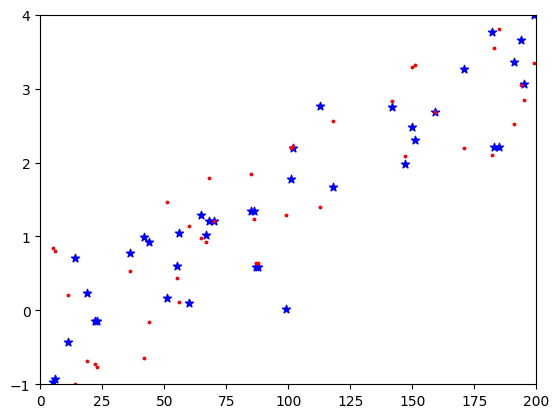

max_depth: 13 
 mse train: 0.015314666985630295,  mse test: 0.7379122432525612 



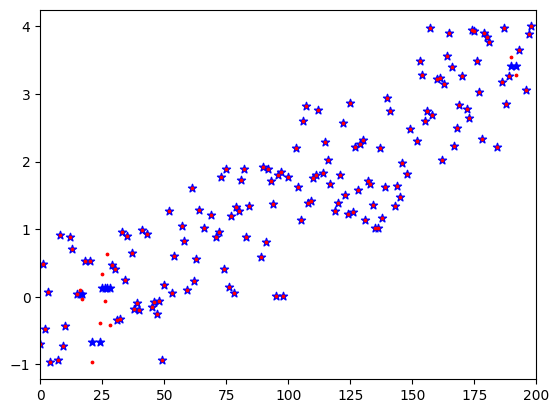

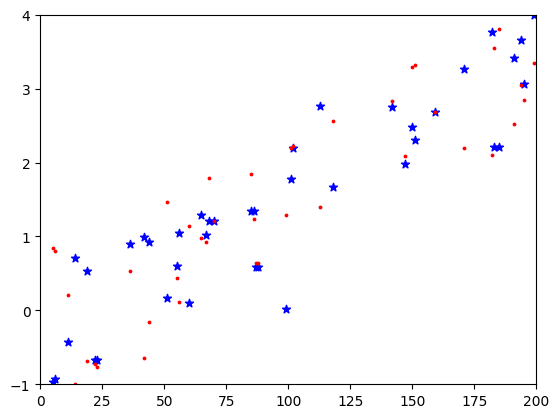

max_depth: 14 
 mse train: 0.004928156631870098,  mse test: 0.7528758305124839 



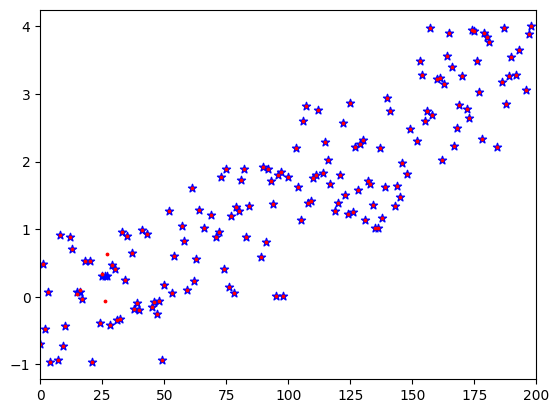

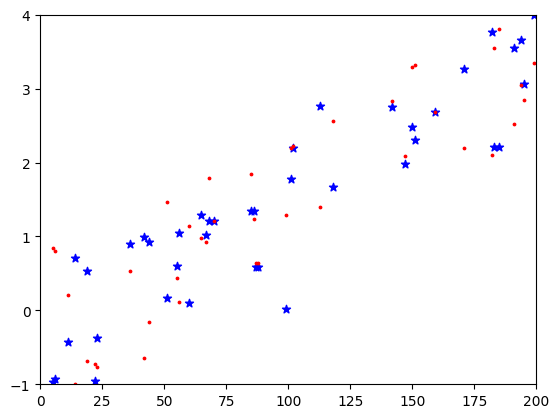

max_depth: 15 
 mse train: 0.002502785837024857,  mse test: 0.7528758305124839 



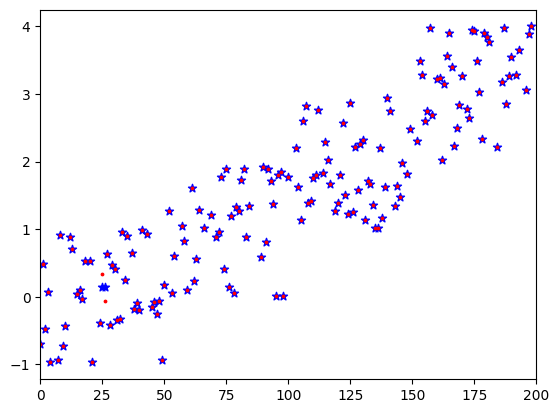

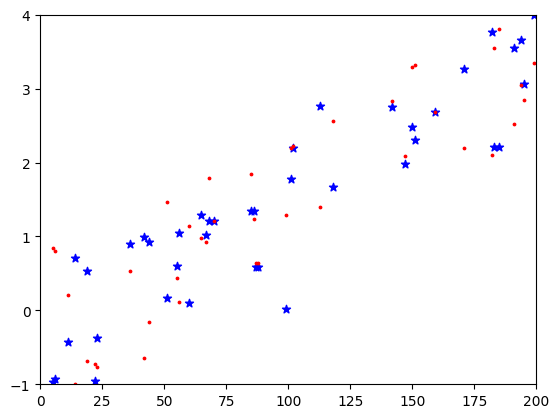

max_depth: 16 
 mse train: 0.0,  mse test: 0.7528758305124839 



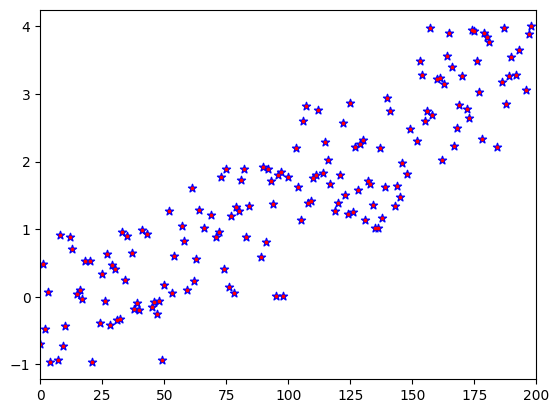

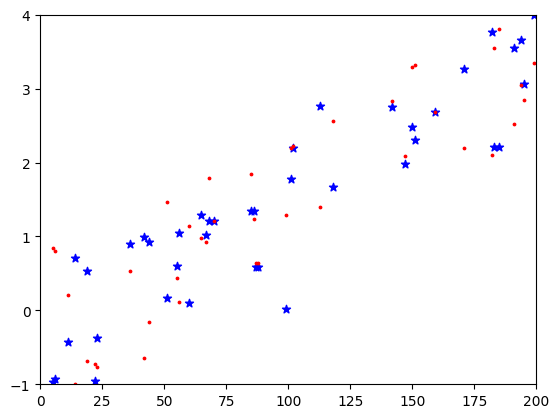

max_depth: 17 
 mse train: 0.0,  mse test: 0.7528758305124839 



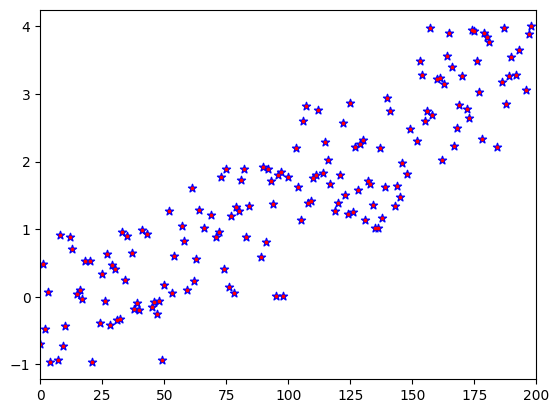

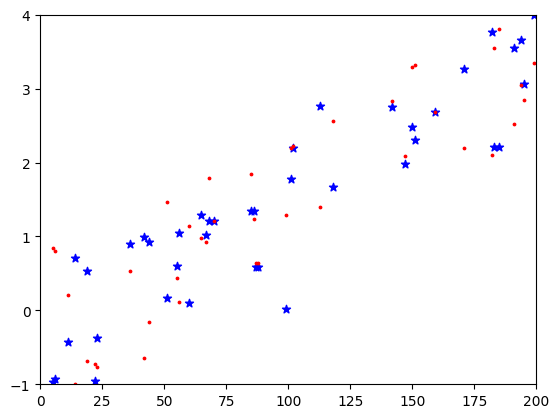

max_depth: 18 
 mse train: 0.0,  mse test: 0.7528758305124839 



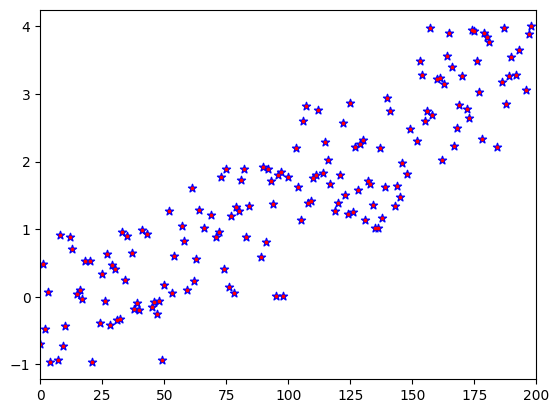

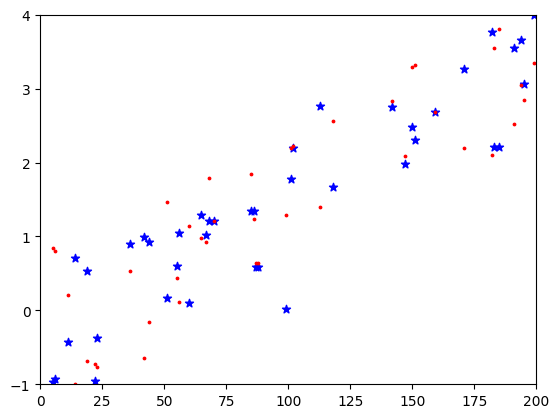

max_depth: 19 
 mse train: 0.0,  mse test: 0.7528758305124839 



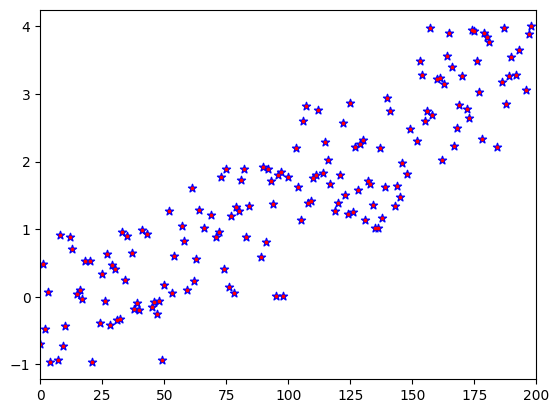

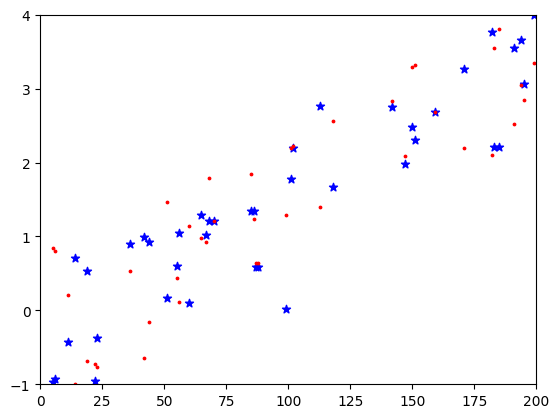

In [18]:
for i in range(1,20):
  clf = DecisionTreeRegressor(max_depth=i).fit(X_train,y_train)

  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)
  print("max_depth: {} \n mse train: {},  mse test: {} \n".format(i,mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_test, y_test_pred)))

  plt.scatter(X_train,y_train_pred,c="blue",marker="*")
  plt.scatter(X_train,y_train,c="red",s=3)
  plt.xlim(0,200)
  plt.show()

  plt.scatter(X_test,y_test_pred,c="blue",marker="*")
  plt.scatter(X_test,y_test,c="red",s=3)
  plt.ylim(-1, 4)
  plt.xlim(0,200)
  plt.show()

*growing decisionsDepth leads to *

## Hyperparameter Optimization

1) What is the difference between parameters and hyperparameters of a model? Give examples!
<br>
*parameters are optimized by the algorithm, (gradient descent, sumOfSquares)
hyperparameters are predisposed, need to be optimized manually*
<br>
2) What is hyperparameter optimization?
<br>
*changing hyperparameters like $\lambda$ in Regularisation, used in CV to optimize in train/eval set*
<br>
3) Name two methods for hyperparameter optimization and compare them.
<br>
*GridSearch - iterate through a given list of values for hyperparameter,
RandomSearch - pick hyperparameter values by chance*
<br>
4) For the following dataset, report the mean absolute error for a `DecisionTreeRegressor` using 10-fold cross validation via the function `cross_val_score`. You can use the function's parameters `cv` and `scoring` to set the the number of cross validation splits and the validation metric (e.g. `neg_mean_absolute_error`). There is no need for an initial train/test split in this example.
<br>

<br>
5) Now use `GridSearchCV` to optimize the `max_depth` parameter in the range of 1,2,3,4 and 5 for a `DecisionTreeRegressor` and report the same score. For this, run `GridSearchCV` with a 10-fold cross-valiation, cf. `cv` and `param_grid` parameters of `GridSearchCV`. GridSearch - best param
<br>

<br>
6) What do you think the notion of *"nested cross-validation"*, *"inner cross-validation"* and *"outer cross-validation* refer to in this example?
<br>
**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error

In [19]:
# generate X and y
# generates X and y
np.random.seed(12)
n_steps = 4
X = np.arange(50 * n_steps).reshape((-1,1))
y_orig = np.repeat(np.arange(4), int(X.shape[0] / n_steps))
y = y_orig + (np.random.random(y_orig.size) - 0.5) * 2




In [26]:
model = DecisionTreeRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="neg_mean_absolute_error")
print(scores)
print("mean_absolute_error: {}".format(mean_absolute_error(y_test,y_pred)))

[-0.66377781 -0.6393318  -0.53697896 -0.67803527 -0.74894846 -0.70821371
 -0.55843725 -0.70701852 -0.35448221 -0.92515108]
mean_absolute_error: 0.7528758305124839


In [27]:
np.mean(scores), np.std(scores)

(-0.6520375069819904, 0.14201240047964356)

In [45]:
parameters = {'max_depth':list(range(1,5))}
cv_model = GridSearchCV(model, param_grid=parameters, cv=10).fit(X_train,y_train)
cv_y_pred_train = cv_model.predict(X_train)
cv_y_pred_test = cv_model.predict(X_test)
print("mean_absolute_error train: {}".format(mean_absolute_error(y_train,cv_y_pred_train)))
print("mean_absolute_error test: {}".format(mean_absolute_error(y_test,cv_y_pred_test)))
print("best_params_ : {}".format(cv_model.best_params_))




mean_absolute_error train: 0.48066920086644666
mean_absolute_error test: 0.5918216499027332
best_params_ : {'max_depth': 2}


In [37]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

## Evaluation: Groups

1) Let's consider a cancer dataset. The goal is to predict the progression of the cancer (e.g., stage 1, stage 2, ...). Each patient appears multiple times in the dataset. Can you randomly split the data into train and test set?
2) Read the [documentation of `GroupedShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html), what does it do? In the process, explain what the `groups` parameter of the split method is used for!
3) Apply `GroupedShuffleSplit` on the data below and examine the results. The [documentation of `GroupedShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) also provides an example.
4) At home, have a look at different [splitting strategies provided by `scikit-learn`](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#visualize-cross-validation-indices-for-many-cv-objects).

In [47]:
# code to generate data (skip this)
from sklearn.model_selection import GroupShuffleSplit
import numpy as np

rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

# Generate the class/group data
n_points = 20
X = rng.randn(n_points, 3)

y = rng.choice([0,1], n_points)

# Generate 10 uneven groups
# draw a prior for the likelihood of each group from the Dirichlet Distribution
# given that we observed elements of each group alpha_i - 1 time (here, alpha_i = 2)
group_prior = rng.dirichlet([2] * 10)
# assign a group [0,...,9] to each of the 20 points
groups = np.repeat(np.arange(10), rng.multinomial(n_points, group_prior))

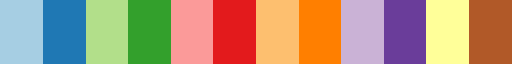

In [51]:
cmap_data

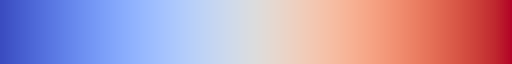

In [52]:
cmap_cv

In [48]:
# use X, y, groups and apply Grouped
X, y, groups

(array([[ 0.30339572,  0.06905289, -1.36994721],
        [-1.73542443,  0.92038986, -0.67328559],
        [ 0.31130278,  1.65990867, -0.38992731],
        [ 0.24670422,  1.26286911, -0.07143212],
        [ 0.21765819, -1.03871059, -0.57730003],
        [ 0.22515547, -1.11415101, -0.21211768],
        [-0.11681968, -0.23243284,  1.01017204],
        [-1.52260114, -0.03899189, -0.4953006 ],
        [-1.26511675,  1.30947599, -0.04807498],
        [ 0.65844446,  1.17818292,  0.92479273],
        [-0.1361633 , -0.43271388, -1.41218241],
        [-1.72601721, -0.12744758,  1.36070897],
        [ 1.80491419, -0.8311191 , -0.75247305],
        [-0.86747453, -1.09877395, -0.01585959],
        [ 1.76340557, -1.0951515 ,  0.65760157],
        [ 0.85346956, -1.34077646,  1.25792539],
        [ 1.40744721, -1.92822233,  0.34033999],
        [-0.82224763,  0.98701143, -0.40516663],
        [-0.47011842, -0.49503657, -0.38135189],
        [ 0.14000614, -0.99631156,  0.47125006]]),
 array([1, 0, 0, 1

In [55]:
#gss = GroupShuffleSplit(n_splits=2, train_size=.7, random_state=42)
split = GroupShuffleSplit().split([X, y, groups])

## Scaling

1) What is scaling?
2) Why is scaling important?
3) What are two comming examples of scaling? What do they do?
4) Apply these two scaling methods to the following data and plot the results. What do you observe (look at the axes)?
5) Add an outlier to the data and try again. What do you observe and why is this a problem?
6) At home, look at the [different scaling procedures provided by `scikit-learn`](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). Which scalers would help aleviate the outlier issue?

In [ ]:
# generate the data
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.multivariate_normal((0,0), [[1,0],[0,1]], 1000,)
X[:,0] = X[:,0] - 3
X[:,1] = X[:,1] / 10

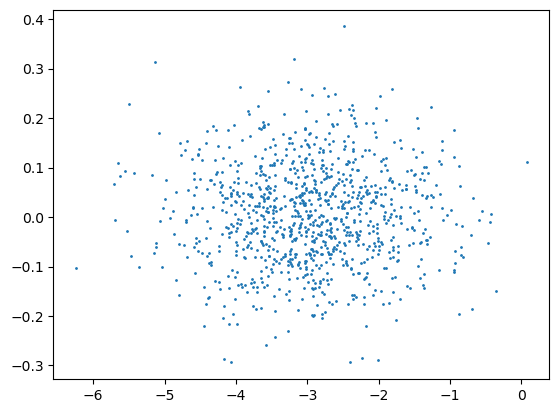

In [ ]:
# plot the data
plt.scatter(X[:,0], X[:,1], s=1)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

## Preprocessing

Given the house prices dataset from Exercise 2:

1) Give some example features for the four different data types.
2) Name at least two issues in this dataset and two others that could occur when training a model.
3) Assume that you are given the postal code of a house - what other features could you add to the data? Why do you think I ask this question?

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
data_houses = pd.read_csv(
    "_assets/house-prices-advanced-regression-techniques/train.csv",
    index_col="Id")